## Dataset : https://www.kaggle.com/datasets/maharshipandya/-spotify-tracks-dataset

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

train=pd.read_csv("train.csv")

In [10]:
print(train.shape)

(114000, 21)


In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

In [12]:
print(train.columns)

Index(['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name',
       'popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre'],
      dtype='object')


In [13]:
round(train.describe(),2)

,Unnamed: 0,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.00,114000.00,114000.00,114000.00,114000.00,114000.00,114000.00,114000.00,114000.00,114000.00,114000.00,114000.00,114000.00,114000.00,114000.00
mean,56999.50,33.24,228029.15,0.57,0.64,5.31,-8.26,0.64,0.08,0.31,0.16,0.21,0.47,122.15,3.90
std,32909.11,22.31,107297.71,0.17,0.25,3.56,5.03,0.48,0.11,0.33,0.31,0.19,0.26,29.98,0.43
min,0.00,0.00,0.00,0.00,0.00,0.00,-49.53,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,28499.75,17.00,174066.00,0.46,0.47,2.00,-10.01,0.00,0.04,0.02,0.00,0.10,0.26,99.22,4.00
50%,56999.50,35.00,212906.00,0.58,0.68,5.00,-7.00,1.00,0.05,0.17,0.00,0.13,0.46,122.02,4.00
75%,85499.25,50.00,261506.00,0.70,0.85,8.00,-5.00,1.00,0.08,0.60,0.05,0.27,0.68,140.07,4.00
max,113999.00,100.00,5237295.00,0.98,1.00,11.00,4.53,1.00,0.96,1.00,1.00,1.00,1.00,243.37,5.00


In [14]:
train.isnull().sum()

Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [15]:
train.rename(columns={'track_name': 'name'}, inplace=True)
train.rename(columns={'track_genre': 'genres'}, inplace=True)
train

,Unnamed: 0,track_id,artists,album_name,name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,genres
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,...,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,...,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,...,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,...,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


In [16]:
duplicates = train[train.duplicated(subset=['name', 'artists'], keep=False)]
duplicates

,Unnamed: 0,track_id,artists,album_name,name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,genres
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.03220,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.92400,0.000006,0.1010,0.267,77.489,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.90500,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.46900,0.000000,0.0829,0.167,119.949,4,acoustic
5,5,01MVOl9KtVTNfFiBU9I7dc,Tyrone Wells,Days I Will Remember,Days I Will Remember,58,214240,False,0.688,0.4810,...,-8.807,1,0.1050,0.28900,0.000000,0.1890,0.666,98.017,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113881,113881,1myRTCOm1pPlykQTiwbEMy,Bryan & Katie Torwalt,I've Got Good News (Live) [Deluxe],Good News - Live,23,266632,False,0.473,0.4740,...,-9.175,1,0.0558,0.39500,0.000000,0.1630,0.251,140.746,4,world-music
113882,113882,7lYdF3SC4SCJPg5kROvXWx,Bryan & Katie Torwalt,I've Got Good News (Live) [Deluxe],Good News - Live,23,266632,False,0.473,0.4740,...,-9.175,1,0.0558,0.39500,0.000000,0.1630,0.251,140.746,4,world-music
113917,113917,4r0ETFFJMBSQ0Z3ntuMDP2,Hillsong Worship;Mi-kaisha Rose,Never Walk Alone (Live),Never Walk Alone - Live,41,348619,False,0.420,0.5530,...,-8.049,1,0.0332,0.14100,0.000000,0.1030,0.214,143.804,4,world-music
113951,113951,54o7m2sWPTagySKiaPPpT2,Passion;Kristian Stanfill,More Like Jesus (Live),More Like Jesus - Live,44,338694,False,0.404,0.6760,...,-5.468,1,0.0354,0.02740,0.000000,0.3520,0.163,144.056,3,world-music


In [17]:
train.drop_duplicates(subset=['name', 'artists'], keep='first', inplace=True)
train

,Unnamed: 0,track_id,artists,album_name,name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,genres
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,...,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,...,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,...,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,...,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


In [18]:
features = ['danceability', 'energy', 'loudness','acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

X = train[features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


C:\Users\Shreya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Shreya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Shreya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Shreya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the valu

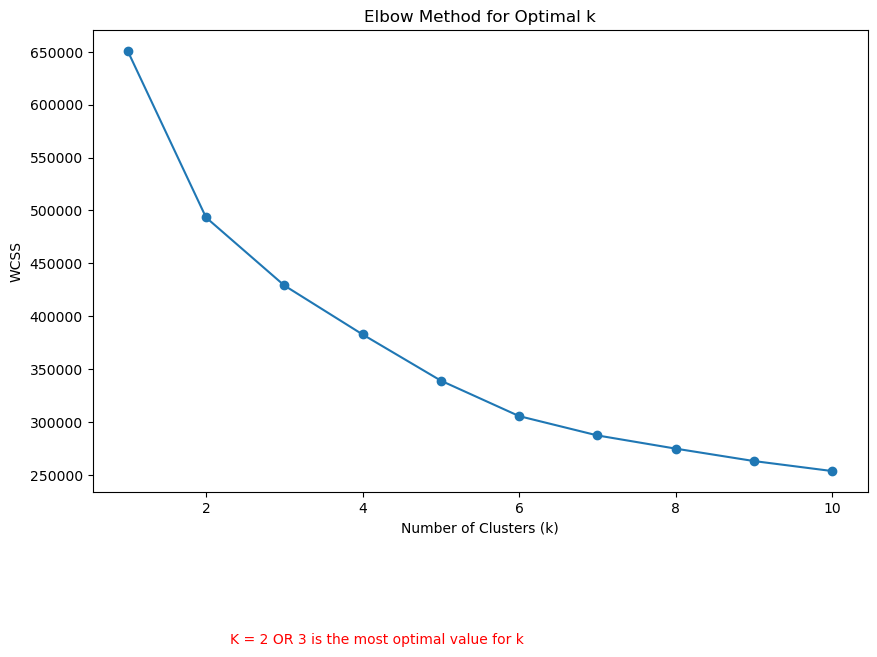

In [19]:
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.text(s=f'K = 2 OR 3 is the most optimal value for k', x=2.3, y=90000, size=10, color='red')
plt.show()


In [144]:
# optimal_k = 3
# kmeans = KMeans(n_clusters=optimal_k, random_state=42)
# train['cluster'] = kmeans.fit_predict(X_scaled)



genres_encoded = pd.get_dummies(train['genres'], prefix='genre')
X_with_genres = pd.concat([X, genres_encoded], axis=1)
scaler = StandardScaler()
X_scaled_with_genres = scaler.fit_transform(X_with_genres)

kmeans = KMeans(n_clusters=3, random_state=42)
train['cluster'] = kmeans.fit_predict(X_scaled_with_genres)



C:\Users\Shreya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


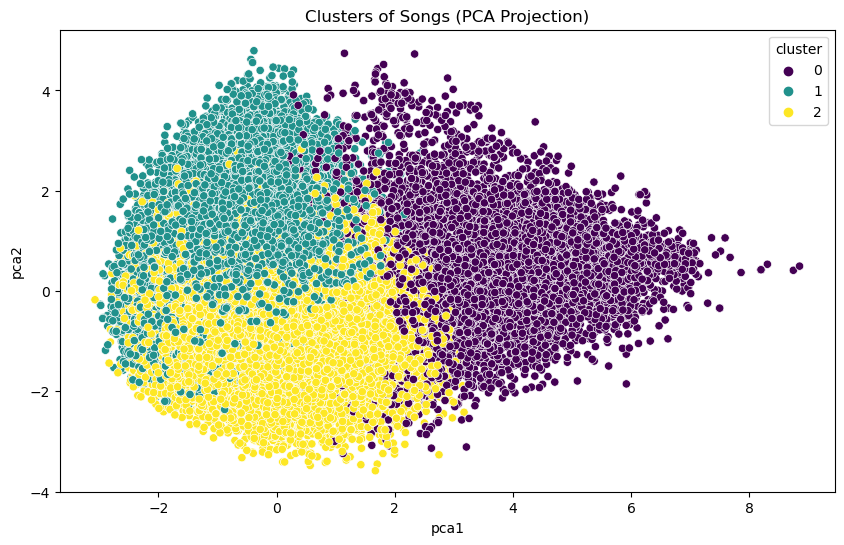

In [145]:
# plt.figure(figsize=(10, 6))
# sns.scatterplot(data=train, x='popularity', y='danceability', hue='cluster', palette='viridis')
# plt.title('Clusters of Songs')
# plt.show()



from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)
train['pca1'] = principal_components[:, 0]
train['pca2'] = principal_components[:, 1]
# plt.figure(figsize=(10, 6))
# sns.scatterplot(data=train, x='pca1', y='pca2', hue='cluster', palette='viridis')
# plt.title('Clusters of Songs (PCA Projection)')
# plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=train, x='pca1', y='pca2', hue='cluster', palette='viridis')
for cluster_id, coords in train.groupby('cluster')[['pca1', 'pca2']].mean().iterrows():
    plt.text(coords['pca1'], coords['pca2'], f'Cluster {cluster_id}', fontsize=12, weight='bold')
plt.title('Clusters with Annotations')
plt.show()




In [146]:
# Profile Clustering
cluster_summary = train.groupby('cluster')[features].mean()
cluster_summary['count'] = train.groupby('cluster').size()
cluster_summary


,danceability,energy,loudness,acousticness,instrumentalness,liveness,valence,tempo,count
cluster,,,,,,,,,
0,0.389790,0.252083,-17.728301,0.787899,0.591755,0.181978,0.229426,105.936619,10584
1,0.546404,0.809522,-6.199152,0.070171,0.226015,0.222812,0.425278,130.307865,32741
2,0.617541,0.591358,-8.113383,0.425579,0.035868,0.227567,0.561109,119.627624,38019


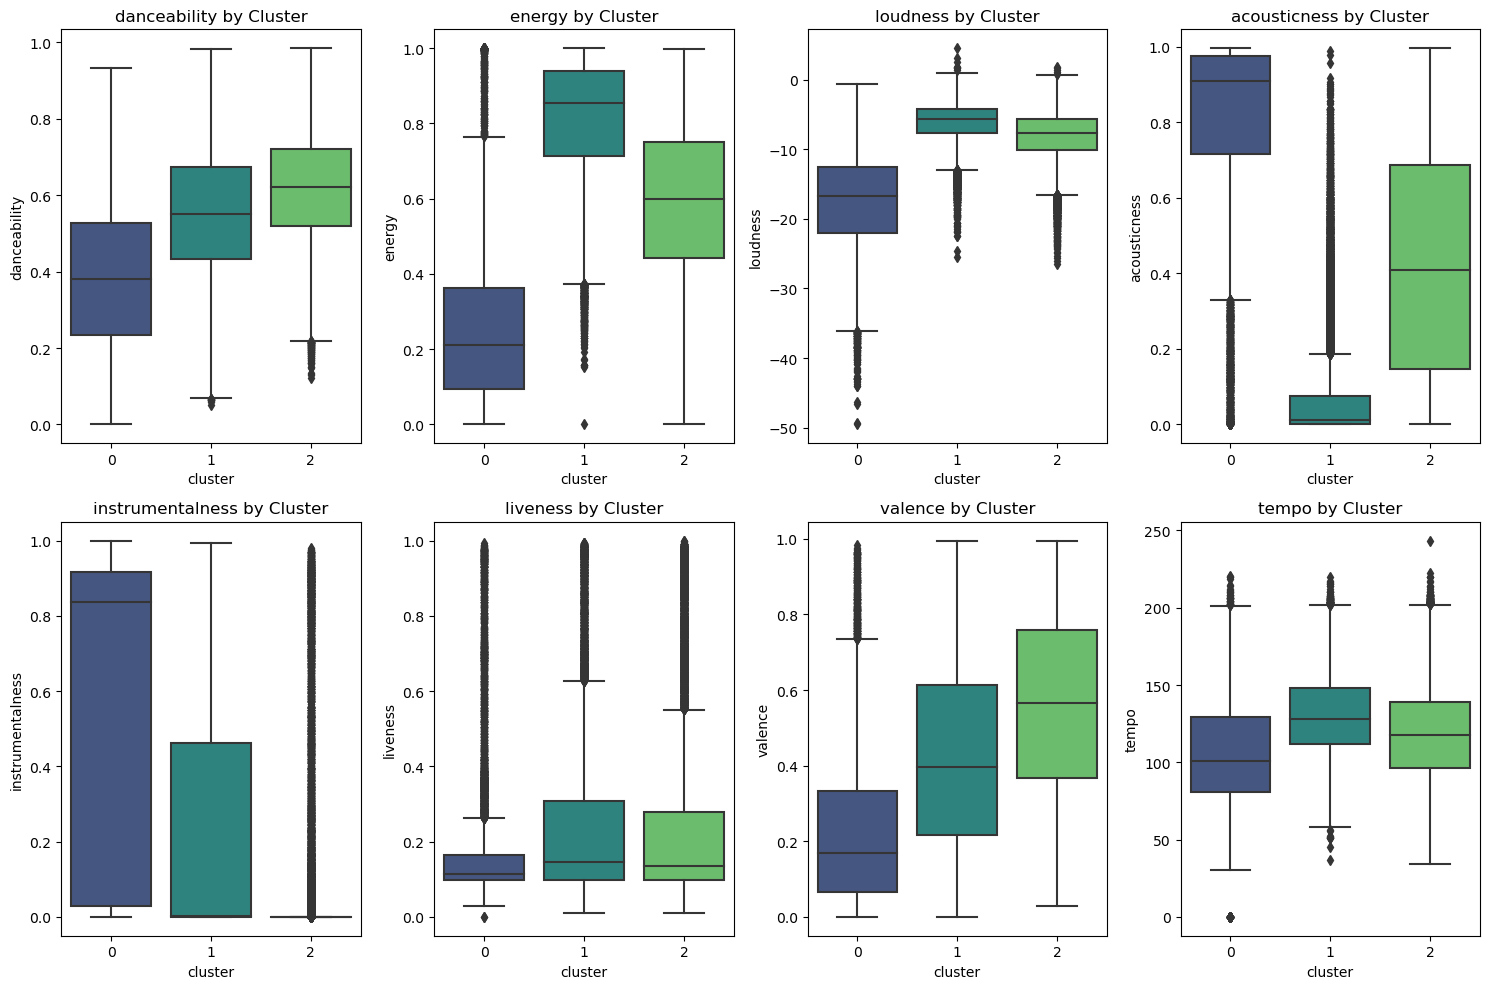

In [147]:
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(data=train, x='cluster', y=feature, palette='viridis')
    plt.title(f'{feature} by Cluster')
plt.tight_layout()
plt.show()


In [26]:
from tabulate import tabulate
 
mydata = [
    ["Mellow and Acoustic", "High Energy and Upbeat", "Happy and Moderately Energetic"],
    ['Calm,Acoustic,Instrumental', 'Upbeat,Energetic,Party', 'Danceable, pop']
]

head = ["Cluster 0", "Cluster 1", "Cluster 2"]

print(tabulate(mydata, headers=head, tablefmt="grid"))


+----------------------------+------------------------+--------------------------------+
| Cluster 0                  | Cluster 1              | Cluster 2                      |
+============================+========================+================================+
| Mellow and Acoustic        | High Energy and Upbeat | Happy and Moderately Energetic |
+----------------------------+------------------------+--------------------------------+
| Calm,Acoustic,Instrumental | Upbeat,Energetic,Party | Danceable, pop                 |
+----------------------------+------------------------+--------------------------------+


In [123]:
genres_encoded = pd.get_dummies(train['genres'], prefix='genre')
train = pd.concat([train, genres_encoded], axis=1)
print(train.columns)  


Index(['Unnamed: 0', 'track_id', 'artists', 'album_name', 'name', 'popularity',
       'duration_ms', 'explicit', 'danceability', 'energy',
       ...
       'genre_spanish', 'genre_study', 'genre_swedish', 'genre_synth-pop',
       'genre_tango', 'genre_techno', 'genre_trance', 'genre_trip-hop',
       'genre_turkish', 'genre_world-music'],
      dtype='object', length=137)


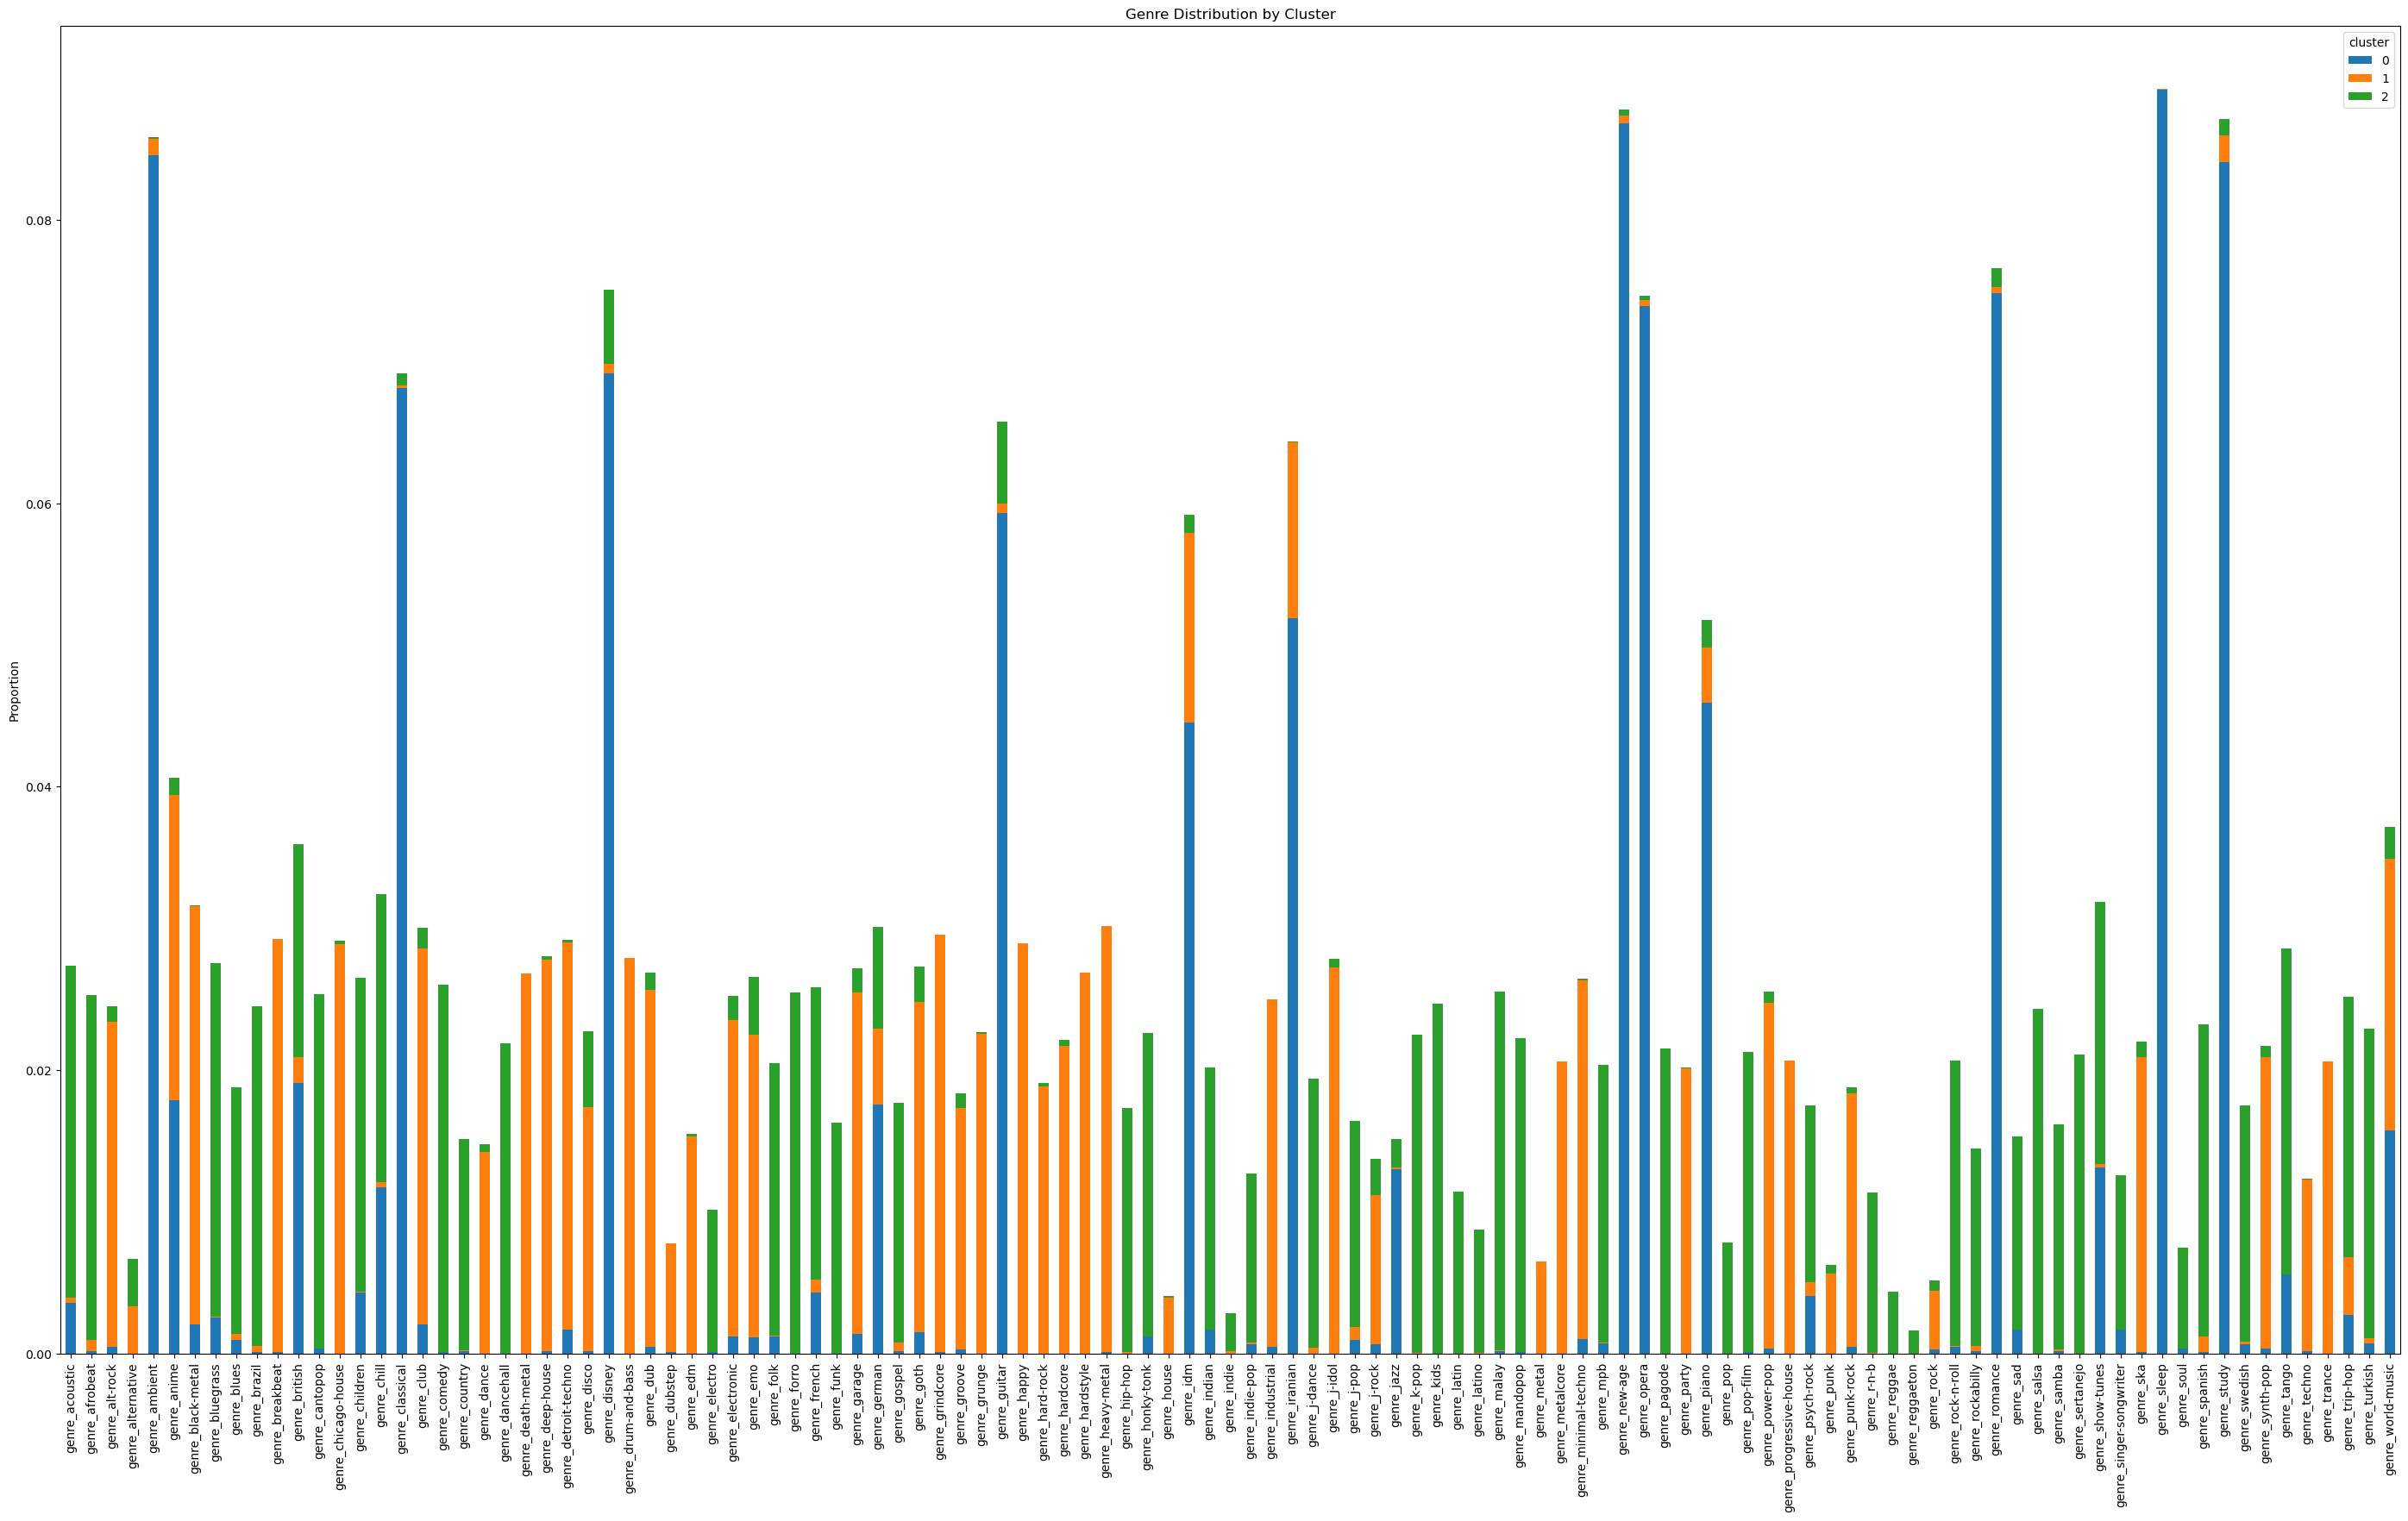

In [124]:
genres_distribution = train.groupby('cluster')[genres_encoded.columns].mean()

genres_distribution.T.plot(kind='bar', figsize=(35, 20), stacked=True)
plt.title('Genre Distribution by Cluster')
plt.ylabel('Proportion')
plt.show()


In [75]:
# METHOD1
# def recommend_from_cluster(song_name, data):
    
#     if song_name not in data['name'].values:
#         print("Song not found in the dataset.")
#         return
   
#     song_cluster = data[data['name'] == song_name]['cluster'].values[0]
    
#     same_cluster_songs = data[data['cluster'] == song_cluster]
    
#     recommendations = same_cluster_songs[same_cluster_songs['name'] != song_name]
# #     recommendations = recommendations.sort_values(by='popularity', ascending=False).head(5)
#     recommendations = recommendations.head(5)
    
#     return recommendations[['name', 'artists', 'popularity','genres']]



# METHOD2
# def recommend_from_cluster(song_name, data):
#     if song_name not in data['name'].values:
#         print("Song not found in the dataset.")
#         return

#     # Get the cluster of the given song
#     song_cluster = data[data['name'] == song_name]['cluster'].values[0]
    
#     # Filter songs belonging to the same cluster
#     same_cluster_songs = data[data['cluster'] == song_cluster]
    
#     # Exclude the song being recommended
#     recommendations = same_cluster_songs[same_cluster_songs['name'] != song_name]
    
#     # Sort by another feature (e.g., 'danceability', 'energy')
#     recommendations = recommendations.head(5)
    
#     return recommendations[['name', 'artists', 'danceability','genres']]



# # METHOD3
# def recommend_from_cluster(song_name, artist_name, data):
#     # Find the song with the specific name and artist
#     song_row = data[(data['name'] == song_name) & (data['artists'] == artist_name)]
    
#     if song_row.empty:
#         print("Song not found in the dataset.")
#         return
    
#     song_cluster = song_row['cluster'].values[0]
    
#     # Get recommendations from the same cluster
#     same_cluster_songs = data[data['cluster'] == song_cluster]
    
#     recommendations = same_cluster_songs[same_cluster_songs['name'] != song_name]
#     recommendations = recommendations.head(5)
    
#     return recommendations[['name', 'artists', 'popularity','genres']]




# METHOD 4
def recommend_from_cluster(song_name, artist_name, data):
    song_row = data[(data['name'] == song_name) & (data['artists'] == artist_name)]
    
    if song_row.empty:
        print("Song not found in the dataset.")
        return
    
    song_cluster = song_row['cluster'].values[0]
    song_genre = song_row['genres'].values[0]
    
    same_cluster_songs = data[data['cluster'] == song_cluster]
    
    recommendations = same_cluster_songs[same_cluster_songs['genres'] == song_genre]
    recommendations = recommendations[same_cluster_songs['name'] != song_name].head(5)
    
    return recommendations[['name', 'artists', 'genres']]



In [76]:
# recommendations = recommend_from_cluster('Bad Liar', train)
# recommendations


# # for method 3
# # Example usage: Get recommendations for "Bad Liar" by Imagine Dragons
# recommendations = recommend_from_cluster('Bad Liar', 'Imagine Dragons', train)
# recommendations


# for METHOD 4
# Example usage for Imagine Dragons
recommendations = recommend_from_cluster('Silvera', 'Gojira', train)
recommendations



C:\Users\Shreya\AppData\Local\Temp\ipykernel_30124\1892202649.py:81: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  recommendations = recommendations[same_cluster_songs['name'] != song_name].head(5)


,name,artists,genres
22000,Our Time Is Now,Gojira,death-metal
22002,Soldier of Fortune,Opeth,death-metal
22003,You Only Live Once,Suicide Silence,death-metal
22004,Voice of the Soul,Death,death-metal
22006,In The Air 2nite,In Element,death-metal


In [78]:
bad_liar_row = train[train['name'] == 'O Re Piya']
bad_liar_row

,Unnamed: 0,track_id,artists,album_name,name,popularity,duration_ms,explicit,danceability,energy,...,genre_spanish,genre_study,genre_swedish,genre_synth-pop,genre_tango,genre_techno,genre_trance,genre_trip-hop,genre_turkish,genre_world-music
34000,34000,7cWnks0lsRtpAi87COOiXK,Salim–Sulaiman;Rahat Fateh Ali Khan;Jaideep Sahni,Aaja Nachle,O Re Piya,71,379768,False,0.586,0.532,...,0,0,0,0,0,0,0,0,0,0


In [79]:
train[train['cluster'] == 2]

,Unnamed: 0,track_id,artists,album_name,name,popularity,duration_ms,explicit,danceability,energy,...,genre_spanish,genre_study,genre_swedish,genre_synth-pop,genre_tango,genre_techno,genre_trance,genre_trip-hop,genre_turkish,genre_world-music
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.461,...,0,0,0,0,0,0,0,0,0,0
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.359,...,0,0,0,0,0,0,0,0,0,0
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.443,...,0,0,0,0,0,0,0,0,0,0
5,5,01MVOl9KtVTNfFiBU9I7dc,Tyrone Wells,Days I Will Remember,Days I Will Remember,58,214240,False,0.688,0.481,...,0,0,0,0,0,0,0,0,0,0
6,6,6Vc5wAMmXdKIAM7WUoEb7N,A Great Big World;Christina Aguilera,Is There Anybody Out There?,Say Something,74,229400,False,0.407,0.147,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113949,113949,1wLWY9NxvVh3AIw78hvRGe,Cesária Evora,Best Of,Sabine Larga’m,23,188917,False,0.546,0.463,...,0,0,0,0,0,0,0,0,0,1
113955,113955,6ibX7aG1bsQzTJb5gUjCpn,Bryan & Katie Torwalt,Praise Before My Breakthrough,My Hallelujah,46,246619,False,0.453,0.498,...,0,0,0,0,0,0,0,0,0,1
113989,113989,0XEgJiDryoDd2gIJhVXghd,Bryan & Katie Torwalt;Brock Human,I've Got Good News (Live) [Deluxe],Hallelujah On My Knees - Live,22,380344,False,0.495,0.281,...,0,0,0,0,0,0,0,0,0,1
113997,113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.329,...,0,0,0,0,0,0,0,0,0,1


In [80]:
cluster_2_data = train[train['cluster'] == 2]

sampled_songs = cluster_2_data.groupby('genres').apply(lambda x: x.sample(n=2, random_state=42) if len(x) >= 2 else x)

sampled_songs = sampled_songs.reset_index(drop=True)

sampled_songs


,Unnamed: 0,track_id,artists,album_name,name,popularity,duration_ms,explicit,danceability,energy,...,genre_spanish,genre_study,genre_swedish,genre_synth-pop,genre_tango,genre_techno,genre_trance,genre_trip-hop,genre_turkish,genre_world-music
0,801,09IZGpkbdHfJS4g33j6ALr,Parker Jenkins,Sweet but Psycho,Sweet but Psycho - Acoustic,43,188712,False,0.664,0.263,...,0,0,0,0,0,0,0,0,0,0
1,505,6YOOCjjIb0pBZXbJjYgUlP,Sara Farell,Dancing With A Stranger,Dancing With A Stranger,43,188735,False,0.595,0.180,...,0,0,0,0,0,0,0,0,0,0
2,1349,3uLmiHycG0TVCoi5yVcXCX,Jorge Drexler,Frontera,El sur del sur,23,225933,False,0.695,0.385,...,0,0,0,0,0,0,0,0,0,0
3,1649,6yO6OJnhpAHAhngPB2Wb5g,Los Amigos Invisibles,Repeat After Me,Mostro,21,160200,False,0.853,0.799,...,0,0,0,0,0,0,0,0,0,0
4,2517,6PypGyiu0Y2lCDBN1XZEnP,R.E.M.,Automatic For The People,Everybody Hurts,75,320266,False,0.467,0.324,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,111736,3zLpc68SSW51CF5kXM81GJ,Roots Manuva;Seanie T,Run Come Save Me,Highest Grade,18,245653,True,0.888,0.695,...,0,0,0,0,0,0,0,1,0,0
195,112734,2FBQ0rV0S780tLI4I5oUWZ,Emre Fel,Deli Sevda,Deli Sevda,39,300179,False,0.471,0.831,...,0,0,0,0,0,0,0,0,1,0
196,112564,1P9oNuhkq4ZMzJB6AkOvbS,Neco,En İyileriyle Neco,Seni Bana Katsam,40,208376,False,0.608,0.477,...,0,0,0,0,0,0,0,0,1,0
197,113907,12Nbr3tbxdEyqjcHjxNM0O,Hillsong Young & Free,Youth Revival,To My Knees (Live),41,473293,False,0.503,0.315,...,0,0,0,0,0,0,0,0,0,1
